In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로드 및 전처리
file_path = 'data/kospi.csv'
df = pd.read_csv(file_path)

In [25]:
# 날짜 변환 및 정렬 (과거 -> 현재)
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values('날짜')
df = df.set_index('날짜')

In [26]:
# 종가 컬럼의 쉼표 제거 및 숫자 변환
df['종가'] = df['종가'].astype(str).str.replace(',', '').astype(float)

In [ ]:
# 12개월 누적 로그 수익률 계산
# 공식: ln(현재 종가) - ln(12개월 전 종가)
df['log_price'] = np.log(df['종가'])
df['12m_log_return'] = df['log_price'].diff(12)  # 12개월(1년) 차분

In [ ]:
# Z-Score 계산
# 전체 기간의 평균과 표준편차 사용
mean_return = df['12m_log_return'].mean()
std_return = df['12m_log_return'].std()

df['z_score'] = (df['12m_log_return'] - mean_return) / std_return

In [30]:
# 결과 확인
print(df[['종가', '12m_log_return', 'z_score']].tail())

                 종가  12m_log_return   z_score
날짜                                           
2025-10-01  4107.50        0.474312  2.444099
2025-11-01  3926.59        0.469274  2.415378
2025-12-01  4214.17        0.563196  2.950792
2026-01-01  5224.36        0.730118  3.902343
2026-02-01  5364.04        0.750400  4.017964


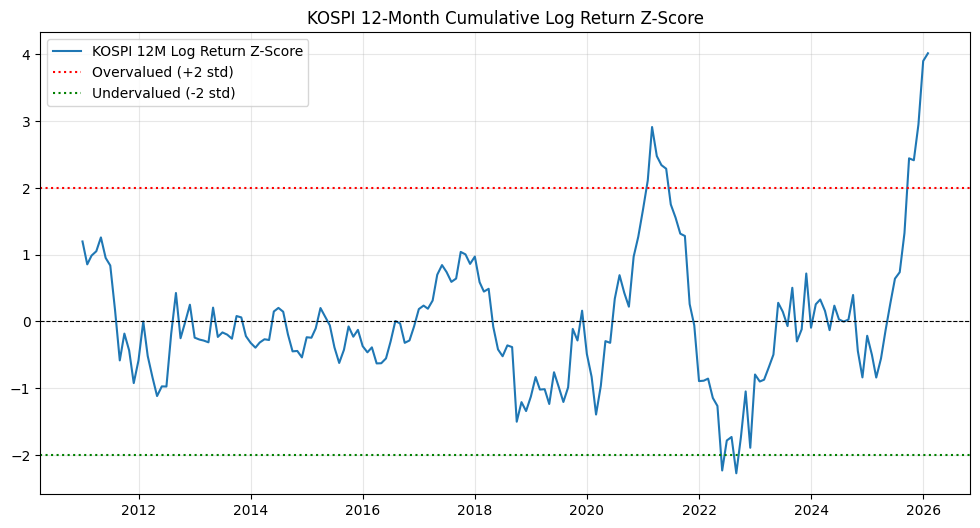

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['z_score'], label='KOSPI 12M Log Return Z-Score')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(2, color='red', linestyle=':', label='Overvalued (+2 std)')
plt.axhline(-2, color='green', linestyle=':', label='Undervalued (-2 std)')
plt.title('KOSPI 12-Month Cumulative Log Return Z-Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# CSV 파일 저장
output_filename = 'data/Z_score지수/kospi_z_score.csv'
df.to_csv(output_filename, encoding='utf-8-sig') # 한글 깨짐 방지를 위해 utf-8-sig 사용
print(f"'{output_filename}' 파일이 저장되었습니다.")

'kospi_z_score.csv' 파일이 저장되었습니다.
